# Get Data

In [6]:
import csv
import numpy as np
from scipy.fftpack import fft
import matplotlib.pyplot as plt

def string_to_float(str_list):
    res = []
    for s in str_list:
        try:
            i = float(s)
            res.append(i)
            #print (i)
        except ValueError:
            #Handle the exception
            #print (ValueError)
            pass
    return np.array(res)

num_features = 10;
def read_data(filename):  
    read_in = np.empty([0, num_features])
    with open(filename, 'r') as f:
        reader = csv.reader(f, dialect='excel', delimiter=',')
        for row in reader:
            if(len(row)==0):
                continue
            if(row[0]=="Start recording..." or row[0]=="End recording..." ):
                continue
            if(len(row)<3):
                continue
            row = string_to_float(row)
            row[0] = 0
            row[1] = 0
            #print(row.shape)
            norm = np.linalg.norm(row)
            if norm != 0: 
                row = row/norm
            #print(row.shape)
            f=[]
            for x in range(num_features):
                this_max = np.argmax(row)
                f.append(this_max/128)
                row[this_max]=0
            read_in = np.vstack([read_in, f])

    return read_in[1:]


In [74]:
jingle = read_data("jingle.txt")
crumble = read_data("crumble.txt")
knock = read_data('knock.txt')
rub = read_data('rubbing.txt')

(86, 10)


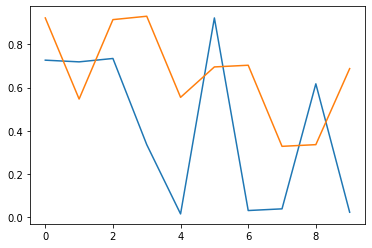

(71, 10)


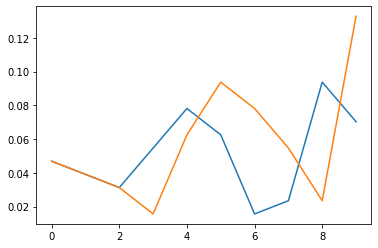

In [75]:
print(jingle.shape)
plt.plot(jingle[0])
plt.plot(jingle[1])
plt.show()
print(knock.shape)
plt.plot(knock[0])
plt.plot(knock[1])
plt.show()

In [80]:
feature_set = np.vstack([jingle, crumble, knock, rub])
labels = np.array([0]*jingle.shape[0] + [1]*crumble.shape[0] + [2]*knock.shape[0] + [3]*rub.shape[0])
one_hot_labels = np.zeros((jingle.shape[0]+crumble.shape[0]+knock.shape[0]+rub.shape[0], 4))

for i in range(len(one_hot_labels)):
    one_hot_labels[i, labels[i]] = 1
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


In [85]:
############# validation
jingle_t = read_data("jingle-test.txt")
crumble_t = read_data("crumble-test.txt")
#clap_t = read_data("clap-test.txt")
knock_t = read_data('knock-test.txt')
rub_t = read_data('rubbing-test.txt')

test_set = np.vstack([jingle_t, crumble_t, clap_t, knock_t, rub_t])
test_labels = np.array([0]*jingle_t.shape[0] + [1]*crumble_t.shape[0] + [2]*knock_t.shape[0] + [3]*rub_t.shape[0])
test_hot_labels = np.zeros((jingle_t.shape[0]+crumble_t.shape[0]+knock_t.shape[0]+rub_t.shape[0], 4))

for i in range(len(test_hot_labels)):
    test_hot_labels[i, test_labels[i]] = 1

In [78]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_der(x):
    return sigmoid(x) *(1-sigmoid (x))

def softmax(x):
    expA = np.exp(x)
    return expA / expA.sum(axis=1, keepdims=True)

In [82]:
instances = feature_set.shape[0]
attributes = feature_set.shape[1]
hidden_nodes = 7
output_labels = 4

wh = np.random.rand(attributes,hidden_nodes)
bh = np.random.randn(hidden_nodes)

wo = np.random.rand(hidden_nodes,output_labels)
bo = np.random.randn(output_labels)
lr = 1e-4

error_cost = []
matches = 0

for epoch in range(100000):
############# feedforward

    # Phase 1
    zh = np.dot(feature_set, wh) + bh
    ah = sigmoid(zh)

    # Phase 2
    zo = np.dot(ah, wo) + bo
    ao = softmax(zo)
########## Back Propagation

########## Phase 1

    dcost_dzo = ao - one_hot_labels
    dzo_dwo = ah

    dcost_wo = np.dot(dzo_dwo.T, dcost_dzo)

    dcost_bo = dcost_dzo

########## Phases 2

    dzo_dah = wo
    dcost_dah = np.dot(dcost_dzo , dzo_dah.T)
    dah_dzh = sigmoid_der(zh)
    dzh_dwh = feature_set
    dcost_wh = np.dot(dzh_dwh.T, dah_dzh * dcost_dah)

    dcost_bh = dcost_dah * dah_dzh

    # Update Weights ================

    wh -= lr * dcost_wh
    bh -= lr * dcost_bh.sum(axis=0)

    wo -= lr * dcost_wo
    bo -= lr * dcost_bo.sum(axis=0)

    if epoch % 2000 == 0:
        ##### validation
        # Phase 1
        zh_t = np.dot(test_set, wh) + bh
        ah_t = sigmoid(zh_t)
        # Phase 2
        zo_t = np.dot(ah_t, wo) + bo
        ao_t = softmax(zo_t)
        loss = np.sum(-one_hot_labels * np.log(ao))
        print('Loss function value: ', loss)
        error_cost.append(loss)
print(np.argmax(ao, axis=1))

Loss function value:  612.5092656897199
Loss function value:  313.8398026154019
Loss function value:  285.03561148059947
Loss function value:  267.36320927516635
Loss function value:  253.45799773692795
Loss function value:  242.04040292101922
Loss function value:  232.61296713081046
Loss function value:  224.8160065124393
Loss function value:  218.33281162527285
Loss function value:  212.88834530563315
Loss function value:  208.25699199916318
Loss function value:  204.2640742566956
Loss function value:  200.78018034482858
Loss function value:  197.71097833512604
Loss function value:  194.98631576719833
Loss function value:  192.55160300697725
Loss function value:  190.36242142780026
Loss function value:  188.38168021669657
Loss function value:  186.5782093177013
Loss function value:  184.92596626136367
Loss function value:  183.4034367803272
Loss function value:  181.99306614254402
Loss function value:  180.68067378956385
Loss function value:  179.45484825454338
Loss function value:  

In [83]:
np.argmax(ao, axis=1)==np.argmax(one_hot_labels, axis=1)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True, False,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,

In [86]:
##### validation 
print(np.argmax(ao_t, axis=1))
np.argmax(ao_t, axis=1)==np.argmax(test_hot_labels, axis=1)

[3 0 1 1 3 1 1 0 0 1 1 1 1 1 2 1 0 1 1 2 2 1 1 2 1 1 2 2 1 2 2 2 2 2 1 0 2
 2 1 2 2 2 1 1 2 2 1 3 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 3 2 1 3 3 3 1 3
 3 3 3 3 3 3 2 3 3 3 3]


d:\program files\python\python37\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  This is separate from the ipykernel package so we can avoid doing imports until


False

In [98]:
print("{")
for i in range(len(wo[0])):
    print("{", end ="")
    for j in range(len(wo)):
        print(wo[j][i], end =", ")
    print("}")
print("}")

{
{6.390415770544719, 3.864857768987916, 3.6951615893904455, -4.969449565877899, 5.29326259654361, 6.038501026062989, 3.0219391446755237, }
{-1.2353650360501904, 5.689014624686331, 3.056564831461606, -2.3417698131735323, 3.18246065070051, 1.1355075049725867, 6.081749259174576, }
{-1.0259225243443306, -2.1560889632100944, -2.5272703075902396, 3.655046078347429, -0.05480071883961702, -0.2912412845283965, -5.222183615735002, }
{-3.270915621183995, -5.211478508011524, -1.430298585232915, 5.633849990745112, -6.851057025905014, -5.0001340439403075, -1.6548008708485733, }
}


In [89]:
for j in range(len(bo)):
        print(bo[j], end =", ")

-6.251234158589457, -3.85623192911671, 4.072815619931995, 6.450452008395163, 

In [97]:
print(wh.shape)
print("{")
for i in range(len(wh[0])):
    #if(i%32==0):
        #print()
        #print("BLA::Matrix<32, 20> wh"+str(i)+"= {", end ="")
    for j in range(len(wh)):
        print(wh[j][i], end =", ")
    print("}")
#print("}")

(10, 7)
{
3.869321088744644, 3.012497903818956, 4.444623811412455, -1.4165283818722891, -0.017502272899242163, 0.9632223966731254, -0.09813452084257251, 1.472447473873816, -0.4086269276282254, 0.6303113178617062, }
5.418314986960057, 5.817461449314383, 4.777810312562797, 2.543210195739539, 3.2811399257276213, 2.379411888810479, 0.7143800788001692, 0.41186229806732627, -0.09516138319938271, -0.16826372867227854, }
2.645723461156366, 3.3622654193867385, 3.283483276220188, 2.1090068116287006, 1.6318861909195939, 2.1352750244382337, 1.8446663790215478, -0.3062225176080679, 0.6226181730350336, 0.8323522179390419, }
-0.4101547889692621, -0.41409120261118393, 0.36311391712468477, 0.5864515028912901, 0.20342822768567823, 0.5730293587441486, 0.49514881933928423, 0.8708797878351027, 0.6608535134520729, 0.41049338316898515, }
6.917273056888901, 5.475243585632074, 4.139905043233442, 1.6955208251150602, 1.0376752502686395, 1.189724328324909, -0.9483457678373018, -0.5228509110477129, -0.396647036878

In [91]:
for j in range(len(bh)):
        print(bh[j], end =", ")

-2.1826883267255788, -1.4066395273450367, -2.032757014919508, 3.6560618826998597, -0.9047025649423838, -1.2320537771628635, -1.9169366721917471, 

In [104]:
###########predict#############
row = [111,85,80,37,25,42,30,43,0,30,19,19,19,24,19,33,25,24,19,19,19,19,19,19,19,19,27,24,24,30,19,19,0,19,8,16,19,19,19,19,16,19,19,16,19,0,27,19,8,19,0,19,19,19,19,19,0,16,19,19,19,19,8,19,0,0,8,0,0,0,0,16,0,0,0,0,0,0,0,0,8,0,8,19,0,0,0,0,0,0,0,0,0,16,8,0,0,0,19,0,16,16,8,0,0,0,0,0,0,0,0,0,0,8,0,16,0,0,0,0,0,16,0,0,0,0,0,8]
row[0] = 0
row[1] = 0
norm = np.linalg.norm(row)
print("Norm:"+str(norm))
if norm != 0: 
    row = row/norm
#print(row.shape)
f=[]
for x in range(num_features):
    this_max = np.argmax(row)
    f.append(this_max/128)
    row[this_max]=0
print(f)
##### validation
# Phase 1
zh_p = np.dot([f], wh) + bh
print(zh_p)
ah_p = sigmoid(zh_p)
print(ah_p)
# Phase 2
zo_p = np.dot(ah_p, wo) + bo
print(zo_p)
ao_p = softmax(zo_p)
print(ao_p)
print(np.argmax(ao_p, axis=1))



Norm:190.73279738943694
[0.015625, 0.0546875, 0.0390625, 0.0234375, 0.1171875, 0.046875, 0.0703125, 0.2265625, 0.203125, 0.359375]
[[-1.30374889 -0.19780974 -0.85260464  4.21951748 -0.29307706 -0.50493243
   0.24328612]]
[[0.21353476 0.45070819 0.29888676 0.98550739 0.42725072 0.37638223
  0.5605233 ]]
[[-0.70952753  2.2458511   2.66849852  2.79121016]]
[[0.0120975  0.23238073 0.3546121  0.40090968]]
[3]


In [31]:
train_result = [True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True, False,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
       False,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False,  True,  True, False,  True,
       False,  True, False, False,  True,  True, False,  True, False,
        True, False, False, False,  True,  True, False, False,  True,
       False,  True, False,  True,  True,  True, False,  True,  True,
       False,  True,  True, False,  True, False,  True,  True,  True,
        True, False, False,  True, False,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False, False,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True, False]
count_false = train_result[train_result==False]
print(len(train_result))
print(np.count_nonzero(train_result)/len(train_result))

310
0.832258064516129


In [17]:
def read_prediction(filename):
    predictions = {"jingle":0, "crumble":0, "knock":0, "rub":0}
    with open(filename, 'r') as f:
        reader = csv.reader(f, dialect='excel', delimiter=',')
        for row in reader:
            if(len(row)==0):
                continue
            if(row[0]=="Start recording..." or row[0]=="End recording..." ):
                continue
            if(len(row)==1):
                if(row[0]=="jingle"):
                    predictions["jingle"]+=1
                elif(row[0]=="crumble"):
                    predictions["crumble"]+=1
                elif(row[0]=="knock"):
                    predictions["knock"]+=1
                elif(row[0]=="rub"):
                    predictions["rub"]+=1
    
    total = predictions["jingle"]+predictions["crumble"]+predictions["knock"]+predictions["rub"]
    for k in predictions:
        predictions[k] /= total
    return predictions



In [32]:
prediction = read_prediction("jingle-predict-l.txt")
for k in prediction:
    print("{}: {:.1f}%".format(k, prediction[k]*100))

jingle: 76.5%
crumble: 20.6%
knock: 2.9%
rub: 0.0%


In [33]:
prediction = read_prediction("crumble-predict-l.txt")
for k in prediction:
    print("{}: {:.1f}%".format(k, prediction[k]*100))

jingle: 5.0%
crumble: 77.5%
knock: 10.0%
rub: 7.5%


In [34]:
prediction = read_prediction("knock-predict-l.txt")
for k in prediction:
    print("{}: {:.1f}%".format(k, prediction[k]*100))

jingle: 0.0%
crumble: 0.0%
knock: 100.0%
rub: 0.0%


In [35]:
prediction = read_prediction("rubbing-predict-l.txt")
for k in prediction:
    print("{}: {:.1f}%".format(k, prediction[k]*100))

jingle: 0.0%
crumble: 5.8%
knock: 19.2%
rub: 75.0%
